In [83]:
import pickle
import re
import importlib
import mytester

importlib.reload(mytester)

from openai import OpenAI
from mytester import Tester
from dotenv import load_dotenv

In [94]:
load_dotenv()
gpt = OpenAI()

In [8]:
with open('test.pkl', 'rb') as f:
    test = pickle.load(f)

In [ ]:
print(len(test))
print(test[0].test_prompt())

In [21]:
def messages_for(item):
    system_prompt = "You estimate prices of items. Reply only with the price, no explanations."
    user_prompt = item.test_prompt().replace(" to the nearest dollar", '').replace('\n\nPrice is $', '')
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user', 'content': user_prompt},
        {'role': 'assistant', 'content': 'Price is $'}
    ]
    return messages

In [ ]:
messages_for(test[0])

In [71]:
PRICE_PATTERN = re.compile(r"[+-]?\d+(\.\d+)?")

def extract_price(text):
    match = PRICE_PATTERN.search(text)
    if match:
        return float(match.group(0))
    else:
        print('Failed to evaluate')
        return 0

In [72]:
print(extract_price("Price is something about $23.45"))

23.45


In [131]:
def gpt_4o_mini_pricer(item):
    resp = gpt.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages_for(item),
        seed=37,
        max_tokens=5
    )
    print(resp)
    return extract_price(resp.choices[0].message.content)
    

In [132]:
gpt_4o_mini_pricer(test[0])

ChatCompletion(id='chatcmpl-CIxhIVdD8qfSL11IQhM7M4YG6gZ0t', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='$25.99', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1758635416, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_51db84afab', usage=CompletionUsage(completion_tokens=4, prompt_tokens=196, total_tokens=200, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


25.99

In [75]:
tester = Tester(test)

Guess = $25.99, Truth = $162.65, Error = $136.66 for Item: Garage-Pro Rear Bumper Step Pad Set of 2 Compatibl...
Guess = $150.00, Truth = $348.37, Error = $198.37 for Item: Draw-Tite 75681 Max-Frame Receiver
Guess = $399.99, Truth = $329.00, Error = $70.99 for Item: Blue Ocean 63” Stainless Steel SPS8863 Thermostati...


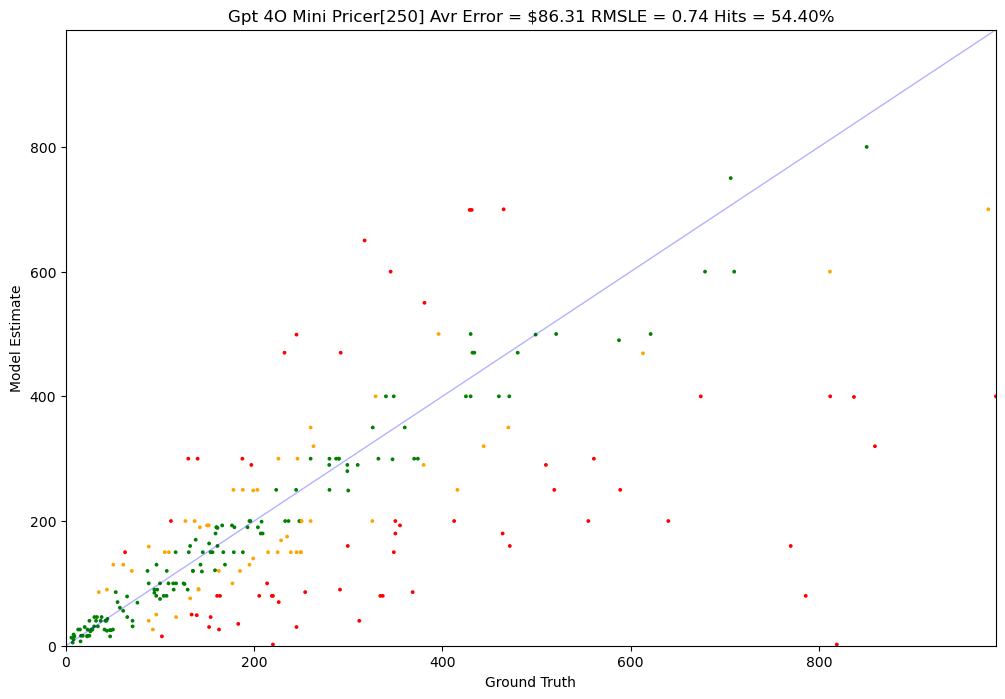

In [76]:
tester.test(gpt_4o_mini_pricer)

Guess = $25.99, Truth = $162.65, Error = $136.66 for Item: Garage-Pro Rear Bumper Step Pad Set of 2 Compatibl...
Guess = $99.99, Truth = $99.99, Error = $0.00 for Item: HABA Basic Building Blocks 60 Piece Large Starter ...
Guess = $189.99, Truth = $203.99, Error = $14.00 for Item: 2 pc Sixity XTA Rear Left Right Axle compatible wi...
Guess = $299.99, Truth = $245.99, Error = $54.00 for Item: ZXMOTO Unpainted Motorcycle Fairing Kit for 2002 2...


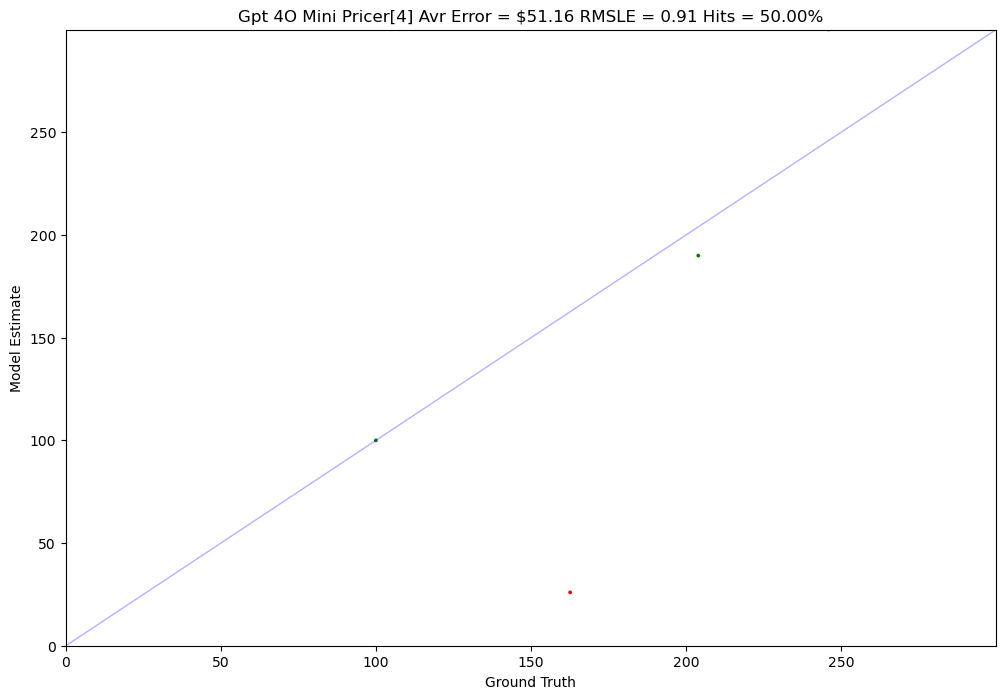

In [84]:
tester = Tester(test[:4])
tester.test(gpt_4o_mini_pricer)

In [99]:
system_prompt = "You estimate prices of items. Reply only with the price, no explanations."

def get_user_prompt(item):
    return item.test_prompt().replace(" to the nearest dollar", '').replace('\n\nPrice is $', '')


In [184]:
def gpt_5_mini_pricer(item):
    response = gpt.responses.create(
        model='gpt-5-mini',
        instructions=system_prompt,
        input=get_user_prompt(item),
        reasoning={"effort": "minimal"},
        max_output_tokens=30
    )
    # print(response.output_text)
    # print(response.output)
    # print(response.usage)

    # print("Output tokens:", response.usage.output_tokens)
    # print("Input tokens:", response.usage.input_tokens)
    # print("Total tokens:", response.usage.total_tokens)

    return extract_price(response.output_text)

In [185]:
print(gpt_5_mini_pricer(test[2]))

189.99


Guess = $29.99, Truth = $162.65, Error = $132.66 for Item: Garage-Pro Rear Bumper Step Pad Set of 2 Compatibl...
Guess = $29.99, Truth = $99.99, Error = $70.00 for Item: HABA Basic Building Blocks 60 Piece Large Starter ...
Guess = $179.99, Truth = $203.99, Error = $24.00 for Item: 2 pc Sixity XTA Rear Left Right Axle compatible wi...
Guess = $189.99, Truth = $245.99, Error = $56.00 for Item: ZXMOTO Unpainted Motorcycle Fairing Kit for 2002 2...
Guess = $39.99, Truth = $60.84, Error = $20.85 for Item: STAR TREK Mirror Spock Statue Paperweight
Guess = $199.99, Truth = $117.00, Error = $82.99 for Item: Element Case Ronin for iPhone 6 iPhone 6s - Bamboo...
Guess = $145.00, Truth = $291.20, Error = $146.20 for Item: American Standard 2064461.002 Serin Inwall SL LAVY...
Guess = $8.00, Truth = $102.00, Error = $94.00 for Item: Pokemon - Mewtwo δ (12) - EX Delta Species - Holof...
Guess = $749.99, Truth = $429.00, Error = $320.99 for Item: Rokinon Cine DS 135mm T2.2 ED UMC Telephoto Cine L...

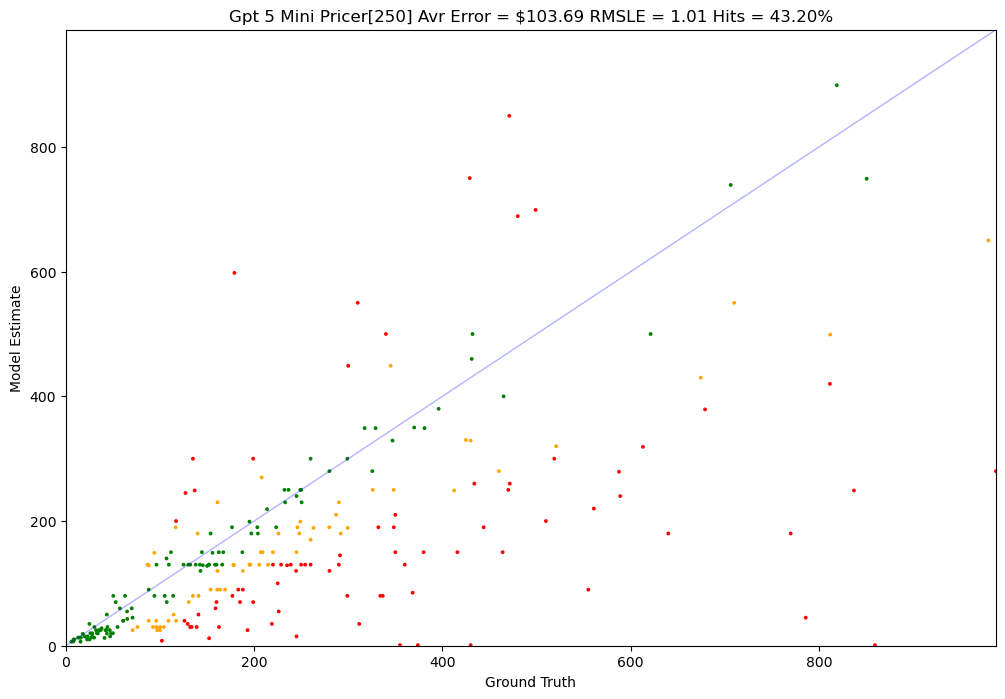

In [186]:
tester = Tester(test)
tester.test(gpt_5_mini_pricer)